# Chapter 10 时序数据
参考DataWhale：https://datawhalechina.github.io/joyful-pandas/%E7%9B%AE%E5%BD%95/ch10.html

In [2]:
import numpy as np
import pandas as pd

## 1. 时序中的基本对象
（1）时间戳（时间点、时刻）：TimeStamp；一系列的时间戳：DatatimeIndex；放在Series中的类型会变成datatime64[ns]或者datatime64[ns, tz]当有时区时。        
（2）时间差（两个TimeStamp做差）：Timedelta；一系列的时间差：TimedeltaIndex；放在Series中的类型会变成timedelta64[ns]。     
（3）时间段（时间区间）：Period；一系列的时间段：PeriodIndex；放在Series中的类型会变成period[freq]。        
（4）日期偏置（不清楚具体日期等）：DateOffset。

## 2. 时间戳
### 2.1 TimeStamp的构造与属性

In [3]:
ts=pd.Timestamp('2020/1/1 08:10:30')
ts

Timestamp('2020-01-01 08:10:30')

In [4]:
#year, month, day, hour, min, second都是属性。
print(ts.year)
print(ts.month)
print(ts.day)
print(ts.hour)
print(ts.minute)
print(ts.second)

2020
1
1
8
10
30


In [5]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [6]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

### 2.2 Datatime序列的生成
一组时间戳可以组成时间序列，可以用to_datetime和date_range来生成。        
（1）to_datetime

In [7]:
pd.to_datetime(['2020-1-1','2020-1-3','2020-1-6'])

DatetimeIndex(['2020-01-01', '2020-01-03', '2020-01-06'], dtype='datetime64[ns]', freq=None)

In [10]:
df=pd.read_csv('/Users/jie/Documents/Python/joyful-pandas-master/data/learn_pandas.csv')
s=pd.to_datetime(df.Test_Date)
s.head()

0   2019-10-05
1   2019-09-04
2   2019-09-12
3   2020-01-03
4   2019-11-06
Name: Test_Date, dtype: datetime64[ns]

In [11]:
#强制使用format匹配时间戳格式
temp=pd.to_datetime(['2020\\1\\1','2020\\1\\3'], format='%Y\\%m\\%d')
temp

DatetimeIndex(['2020-01-01', '2020-01-03'], dtype='datetime64[ns]', freq=None)

In [12]:
#多列时间属性拼接转为时间序列
df_date_cols = pd.DataFrame({'year':[2020, 2020], 'month':[1, 1], 'day':[1, 2], 'hour': [10,20], 'minute': [30,50], 'second': [20,40]})
pd.to_datetime(df_date_cols)

0   2020-01-01 10:30:20
1   2020-01-02 20:50:40
dtype: datetime64[ns]

date_range生成连续间隔时间的一种方法，重要参数有start（开始时间）、end（结束时间）、freq（时间间隔）、periods（时间戳个数），决定三个会直接确定所有的四个参数，且会包括端点时间。

In [15]:
pd.date_range('2020-1-1','2020-1-21', freq='10D')

DatetimeIndex(['2020-01-01', '2020-01-11', '2020-01-21'], dtype='datetime64[ns]', freq='10D')

In [14]:
pd.date_range('2020-1-1','2020-2-28', freq='10D')

DatetimeIndex(['2020-01-01', '2020-01-11', '2020-01-21', '2020-01-31',
               '2020-02-10', '2020-02-20'],
              dtype='datetime64[ns]', freq='10D')

In [16]:
pd.date_range('2020-1-1','2020-2-28', periods=6)

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-12 14:24:00',
               '2020-01-24 04:48:00', '2020-02-04 19:12:00',
               '2020-02-16 09:36:00', '2020-02-28 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [17]:
#练一练
ts=pd.Timestamp('2020/1/1 00:00:00')
ts.value

1577836800000000000

In [18]:
#asfreq：根据给定的freq对序列进行类似于reindex的操作
s = pd.Series(np.random.rand(5), index=pd.to_datetime(['2020-1-%d'%i for i in range(1,10,2)]))
s.head()

2020-01-01    0.163914
2020-01-03    0.217876
2020-01-05    0.058040
2020-01-07    0.951555
2020-01-09    0.414549
dtype: float64

In [19]:
s.asfreq('D').head()

2020-01-01    0.163914
2020-01-02         NaN
2020-01-03    0.217876
2020-01-04         NaN
2020-01-05    0.058040
Freq: D, dtype: float64

In [20]:
s.asfreq('12H').head()

2020-01-01 00:00:00    0.163914
2020-01-01 12:00:00         NaN
2020-01-02 00:00:00         NaN
2020-01-02 12:00:00         NaN
2020-01-03 00:00:00    0.217876
Freq: 12H, dtype: float64

### 2.3 dt对象
用dt对象来完成许多时间序列的相关操作。
（1）去除时间相关的属性：date、time、year、month、day、hour、minute、second、microsecond、nanosecond、dayofweek、dayofyear、weekofyear、daysinmonth、quarter。

In [23]:
s=pd.Series(pd.date_range('2020-1-1','2020-1-3', freq='D'))
s.dt.date

0    2020-01-01
1    2020-01-02
2    2020-01-03
dtype: object

In [24]:
s.dt.time

0    00:00:00
1    00:00:00
2    00:00:00
dtype: object

In [25]:
#周一是0
s.dt.dayofweek

0    2
1    3
2    4
dtype: int64

In [26]:
#month_name() or day_name()
s.dt.day_name()

0    Wednesday
1     Thursday
2       Friday
dtype: object

（2）判断时间戳是否满足条件：is_year/quarter/month_start、is_year/quarter/month_end

In [27]:
s.dt.is_year_start

0     True
1    False
2    False
dtype: bool

（3）取整操作：round、ceil、floor。公共参数是freq（H、min、S等）。

In [28]:
s = pd.Series(pd.date_range('2020-1-1 20:35:00','2020-1-1 22:35:00', freq='45min'))
s

0   2020-01-01 20:35:00
1   2020-01-01 21:20:00
2   2020-01-01 22:05:00
dtype: datetime64[ns]

In [29]:
s.dt.round('1H')

0   2020-01-01 21:00:00
1   2020-01-01 21:00:00
2   2020-01-01 22:00:00
dtype: datetime64[ns]

In [30]:
s.dt.ceil('1H')

0   2020-01-01 21:00:00
1   2020-01-01 22:00:00
2   2020-01-01 23:00:00
dtype: datetime64[ns]

In [31]:
s.dt.floor('1H')

0   2020-01-01 20:00:00
1   2020-01-01 21:00:00
2   2020-01-01 22:00:00
dtype: datetime64[ns]

### 2.4 时间戳的切片与索引
（1）dt对象➕布尔条件

In [33]:
s = pd.Series(np.random.randint(2,size=366), index=pd.date_range('2020-01-01','2020-12-31'))
idx=pd.Series(s.index).dt
s.head()

2020-01-01    0
2020-01-02    1
2020-01-03    0
2020-01-04    0
2020-01-05    0
Freq: D, dtype: int64

In [34]:
#每月的第一天或最后一天
s[(idx.is_month_start|idx.is_month_end).values].head()

2020-01-01    0
2020-01-31    0
2020-02-01    0
2020-02-29    0
2020-03-01    1
dtype: int64

In [35]:
#双休日
s[idx.dayofweek.isin([5,6]).values].head()

2020-01-04    0
2020-01-05    0
2020-01-11    1
2020-01-12    1
2020-01-18    0
dtype: int64

（2）利用切片，常用于连续时间戳。

In [36]:
#七月
s['2020-07'].head()

2020-07-01    0
2020-07-02    1
2020-07-03    1
2020-07-04    1
2020-07-05    1
Freq: D, dtype: int64

## 3. 时间差
### 3.1 Timedelta的生成
（1）pd.Timedelta：构造时间差。

In [38]:
pd.Timedelta(days=1, minutes=25)

Timedelta('1 days 00:25:00')

In [39]:
pd.Timedelta('1 days 25 minutes')

Timedelta('1 days 00:25:00')

（2）pd.to_timedelta：生成时间差序列。

In [40]:
s=pd.to_timedelta(df.Time_Record)
s.head()

0   0 days 00:04:34
1   0 days 00:04:20
2   0 days 00:05:22
3   0 days 00:04:08
4   0 days 00:05:22
Name: Time_Record, dtype: timedelta64[ns]

（3）timedelta_range：生成时间差序列。

In [43]:
pd.timedelta_range('0s', '1000s', freq='6min')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:06:00', '0 days 00:12:00'], dtype='timedelta64[ns]', freq='6T')

（4）dt对象：days、seconds（对天数取余后剩余的秒数）、mircroseconds、nanoseconds。

In [44]:
s.dt.seconds.head()

0    274
1    260
2    322
3    248
4    322
Name: Time_Record, dtype: int64

In [46]:
#直接对应秒数
s.dt.total_seconds().head()

0    274.0
1    260.0
2    322.0
3    248.0
4    322.0
Name: Time_Record, dtype: float64

In [47]:
pd.to_timedelta(df.Time_Record).dt.round('min').head()

0   0 days 00:05:00
1   0 days 00:04:00
2   0 days 00:05:00
3   0 days 00:04:00
4   0 days 00:05:00
Name: Time_Record, dtype: timedelta64[ns]

### 3.2 Timedelta的运算

In [48]:
td1=pd.Timedelta(days=1)
td2=pd.Timedelta(days=3)
ts=pd.Timestamp('20200101')

（1）与标量的乘法

In [49]:
td1*2

Timedelta('2 days 00:00:00')

（2）与时间戳的加减法运算

In [51]:
ts-td1

Timestamp('2019-12-31 00:00:00')

（3）与时间差的加减法与除法运算

In [52]:
td1-td2

Timedelta('-2 days +00:00:00')

（4）类似在时间差序列上

In [54]:
td1=pd.timedelta_range(start='1 days', periods=5)
td2=pd.timedelta_range(start='12 hours', freq='2H', periods=5)
ts=pd.date_range('20200101', '20200105')
print(td1*5)
print(td1-td2)
print(td1+ts)

TimedeltaIndex(['5 days', '10 days', '15 days', '20 days', '25 days'], dtype='timedelta64[ns]', freq='5D')
TimedeltaIndex(['0 days 12:00:00', '1 days 10:00:00', '2 days 08:00:00',
                '3 days 06:00:00', '4 days 04:00:00'],
               dtype='timedelta64[ns]', freq=None)
DatetimeIndex(['2020-01-02', '2020-01-04', '2020-01-06', '2020-01-08',
               '2020-01-10'],
              dtype='datetime64[ns]', freq=None)


## 4. 日期偏置
### 4.1 offset对象

In [55]:
#2020年9月第一个周一的日期
pd.Timestamp('20200831')+pd.offsets.WeekOfMonth(week=0, weekday=0)

Timestamp('2020-09-07 00:00:00')

In [56]:
#2020年9月7日后的第30个工作日是那一天
pd.Timestamp('20200907')+pd.offsets.BDay(30)

Timestamp('2020-10-19 00:00:00')

In [57]:
#CDay: holidays(需要过滤的日期列表), weekmask(三个字母的星期缩写构成的星期字符串以保留)
my_filter=pd.offsets.CDay(n=1, weekmask='Wed Fri', holidays=['20200109'])
dr=pd.date_range('20200108', '20200111')
dr.to_series().dt.dayofweek

2020-01-08    2
2020-01-09    3
2020-01-10    4
2020-01-11    5
Freq: D, dtype: int64

In [58]:
[i+my_filter for i in dr]

[Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-15 00:00:00'),
 Timestamp('2020-01-15 00:00:00')]

### 4.2 偏置字符串
freq='MS'（月初）, 'M'（月末）, 'B'（工作日）, 'W-MON'（周一）, 'WOM-1MON'（每月第一个周一）。

In [59]:
#月初
pd.date_range('20200101', '20200331', freq='MS')

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01'], dtype='datetime64[ns]', freq='MS')

In [60]:
pd.date_range('20200101', '20200331', freq=pd.offsets.MonthBegin())

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01'], dtype='datetime64[ns]', freq='MS')

## 5. 时序中的滑窗与分组
### 5.1 滑动窗口
把滑动窗口用freq关键词代替。

In [62]:
import matplotlib.pyplot as plt
idx=pd.date_range('20200101', '20201231', freq='B')
np.random.seed(2020)
data=np.random.randint(-1,2,len(idx)).cumsum()
s=pd.Series(data, index=idx)
s.head()

2020-01-01   -1
2020-01-02   -2
2020-01-03   -1
2020-01-06   -1
2020-01-07   -2
Freq: B, dtype: int64

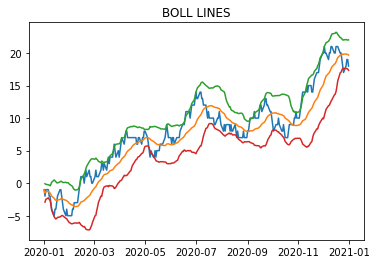

In [65]:
r=s.rolling('30D')
plt.plot(s)
plt.title('BOLL LINES')
plt.plot(r.mean())
plt.plot(r.mean()+r.std()*2)
plt.plot(r.mean()-r.std()*2)

In [66]:
s.shift(freq='50D').head()

2020-02-20   -1
2020-02-21   -2
2020-02-22   -1
2020-02-25   -1
2020-02-26   -2
dtype: int64

In [67]:
my_series=pd.Series(s.index)
my_series.head()

0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-06
4   2020-01-07
dtype: datetime64[ns]

In [68]:
my_series.diff(1).head()

0      NaT
1   1 days
2   1 days
3   3 days
4   1 days
dtype: timedelta64[ns]

### 5.2 重采样
resample

In [70]:
s.resample('10D').mean().head()

2020-01-01   -2.000000
2020-01-11   -3.166667
2020-01-21   -3.625000
2020-01-31   -4.000000
2020-02-10   -0.375000
Freq: 10D, dtype: float64

In [71]:
s.resample('10D').apply(lambda x: x.max()-x.min()).head()

2020-01-01    3
2020-01-11    4
2020-01-21    4
2020-01-31    2
2020-02-10    4
Freq: 10D, dtype: int64

In [72]:
idx=pd.date_range('20200101 8:26:35', '20200109 9:31:58', freq='77s')
data=np.random.randint(-1,2,len(idx)).cumsum()
s=pd.Series(data, index=idx)
s.head()

2020-01-01 08:26:35   -1
2020-01-01 08:27:52   -1
2020-01-01 08:29:09   -2
2020-01-01 08:30:26   -3
2020-01-01 08:31:43   -4
Freq: 77S, dtype: int64

## 6. 练习
### Ex1: 太阳辐射数据集

In [129]:
df1=pd.read_csv('/Users/jie/Documents/Python/joyful-pandas-master/data/solar.csv', usecols=['Data','Time','Radiation','Temperature'])
df1.head(3)

,Data,Time,Radiation,Temperature
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48


In [131]:
#1.
df1['Datetime']=pd.to_datetime(df1['Data'].str.split('\s', n=1, expand=True)[0]+' '+df1['Time'])
df1.drop(columns=['Data','Time']).set_index('Datetime').sort_index()

,Radiation,Temperature
Datetime,,
2016-09-01 00:00:08,2.58,51
2016-09-01 00:05:10,2.83,51
2016-09-01 00:20:06,2.16,51
2016-09-01 00:25:05,2.21,51
2016-09-01 00:30:09,2.25,51
...,...,...
2016-12-31 23:35:02,1.22,41
2016-12-31 23:40:01,1.21,41
2016-12-31 23:45:04,1.21,42


In [137]:
#2.
df1['Datetime'].diff(-1)

0       0 days 00:05:03
1       0 days 00:04:57
2       0 days 00:05:05
3       0 days 00:04:57
4       0 days 00:05:00
              ...      
32681   0 days 00:05:03
32682   0 days 00:05:00
32683   0 days 00:04:59
32684   0 days 00:05:00
32685               NaT
Name: Datetime, Length: 32686, dtype: timedelta64[ns]